In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,228.969,239.541,113.201,0.00238,0.000010,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
1,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
2,110.739,113.597,100.139,0.00356,0.000030,0.00170,0.00200,0.00510,0.01484,0.133,...,0.01285,0.02261,0.00430,26.550,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
3,128.940,479.697,88.251,0.00581,0.000050,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
4,149.689,160.368,133.608,0.00257,0.000020,0.00116,0.00134,0.00349,0.01346,0.126,...,0.01059,0.01979,0.00578,27.421,0.365488,0.719974,-6.997403,0.210279,1.994387,0.112878
5,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
6,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
7,209.144,237.494,109.379,0.00282,0.000010,0.00147,0.00152,0.00442,0.01861,0.170,...,0.01382,0.02925,0.00871,25.554,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516
8,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
9,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


,status
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,0
8,0
9,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
1,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.00860,0.01841,0.00432,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.00726,0.01403,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
3,145.174,198.109,80.637,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
4,169.774,191.759,151.451,0.01568,0.000090,0.00863,0.00946,0.02589,0.08143,0.821,...,0.08808,0.11411,0.07530,12.359,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,139.224,586.567,66.157,0.03011,0.000220,0.01854,0.01628,0.05563,0.09419,0.930,...,0.06023,0.16654,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
172,198.116,233.099,174.478,0.02714,0.000140,0.01568,0.01699,0.04705,0.08684,1.018,...,0.08318,0.12851,0.16265,9.449,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
173,150.440,163.441,144.736,0.00396,0.000030,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
174,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


,status
0,0
1,0
2,0
3,1
4,1
...,...
171,1
172,1
173,1
174,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,200.714,223.982,89.686,0.00621,0.000030,0.00371,0.00337,0.01112,0.02286,0.207,...,0.01852,0.03576,0.00704,23.239,0.436084,0.727863,-5.258320,0.256454,2.550961,0.232520
1,154.003,160.267,128.621,0.00183,0.000010,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
2,113.400,133.344,107.816,0.00451,0.000040,0.00219,0.00283,0.00658,0.04879,0.431,...,0.04370,0.07154,0.02278,19.013,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
3,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
4,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
5,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
6,115.322,135.738,107.802,0.00619,0.000050,0.00352,0.00329,0.01057,0.03273,0.325,...,0.02931,0.04933,0.02810,19.388,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
7,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
8,152.845,163.305,75.836,0.00294,0.000020,0.00121,0.00149,0.00364,0.01828,0.158,...,0.01246,0.03191,0.00609,24.922,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
9,122.336,142.369,94.794,0.00727,0.000060,0.00415,0.00339,0.01246,0.02293,0.223,...,0.01771,0.03615,0.03191,22.953,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546


,status
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,1
9,1


In [3]:
#use the Isolation Forest model to search for anomalies
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

clf.fit(train_X)

# create a column for the predictions
df['anomaly_score'] = clf.decision_function(train_X)
df['outlier'] = clf.predict(train_X)
anomaly_test = clf.decision_function(test_X)
anomalies_test = anomaly_test < anomaly_threshold
anomaly_val = clf.decision_function(val_X)
anomalies_val = anomaly_val < anomaly_threshold
train_out = df.loc[df['outlier']==-1].index


# show the number of outliers
print(df['outlier'].value_counts())
print(anomalies_test)
print(anomalies_val)
display(df.loc[df['outlier']==-1])

# Remove the outliers from the data
X_train_no_outliers = np.delete(train_X, train_out, axis=0)
y_train_no_outliers = np.delete(train_y, train_out)

outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
43,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1,-0.001802,-1
111,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.031077,-1


In [4]:
train_X = train_X.values
#train_X = train_X.to_numpy()

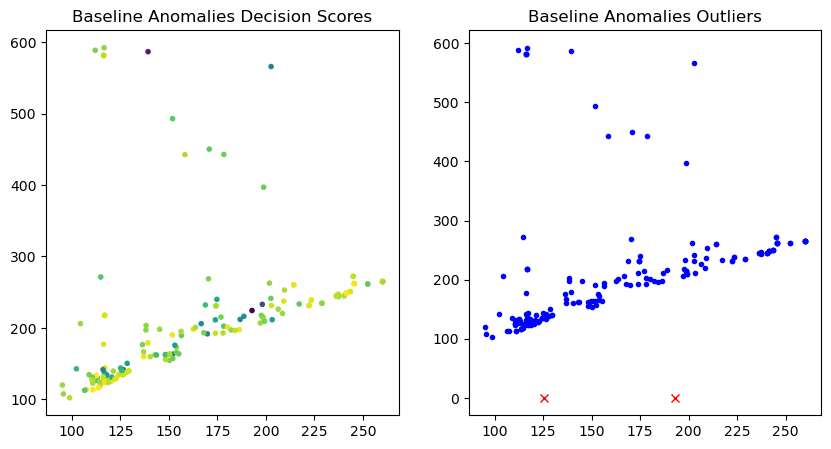

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.270177,-1.0,-0.001802
1,1.0,0.233540,-1.0,-0.031077


In [5]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

clf.fit(train_X)
predictions_X = clf.predict(train_X)

ax1.scatter(train_X[:, 0], train_X[:, 1], c=clf.decision_function(train_X), marker='.')
ax1.set_title('Baseline Anomalies Decision Scores')
ax2.plot(train_X[predictions_X==1][:,0], train_X[predictions_X==1][:,1], 'b.')
ax2.plot(train_X[predictions_X==-1][:,0], train_X[predictions_X==-1][:,-1], 'rx')
ax2.set_title('Baseline Anomalies Outliers')
plt.show()

df = pd.DataFrame(dict(predicted_label=clf.predict(train_X), score=clf.decision_function(train_X)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
base_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(base_scores)

## Experimenting with Baseline data Outliers Intact

### Experimenting with PCA - Baseline

Component 1: Explained Variance 0.6824936924453302
Component 2: Explained Variance 0.9587005011473978
Component 3: Explained Variance 0.998812549945614
Component 4: Explained Variance 0.9999638261251155
Component 5: Explained Variance 0.999994494549574
Component 6: Explained Variance 0.9999986070992096
Component 7: Explained Variance 0.9999993097180702
Component 8: Explained Variance 0.999999677019615
Component 9: Explained Variance 0.9999998572437102
Component 10: Explained Variance 0.9999999350109472
Component 11: Explained Variance 0.9999999675591956
Component 12: Explained Variance 0.9999999950086299
Component 13: Explained Variance 0.9999999986586624
Component 14: Explained Variance 0.999999999448707
Component 15: Explained Variance 0.9999999998034923
Component 16: Explained Variance 0.9999999999580899
Component 17: Explained Variance 0.9999999999848704
Component 18: Explained Variance 0.9999999999968198
Component 19: Explained Variance 0.9999999999999981
Component 20: Explained V

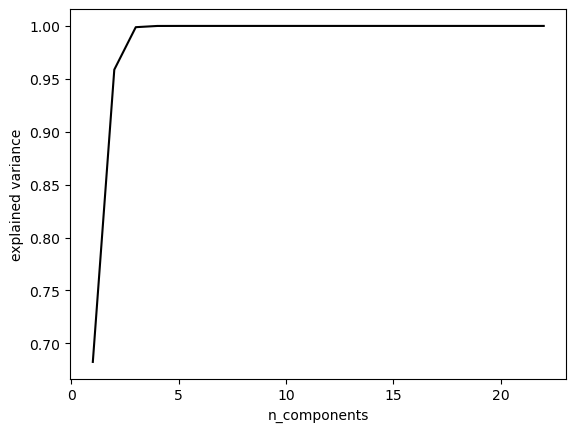

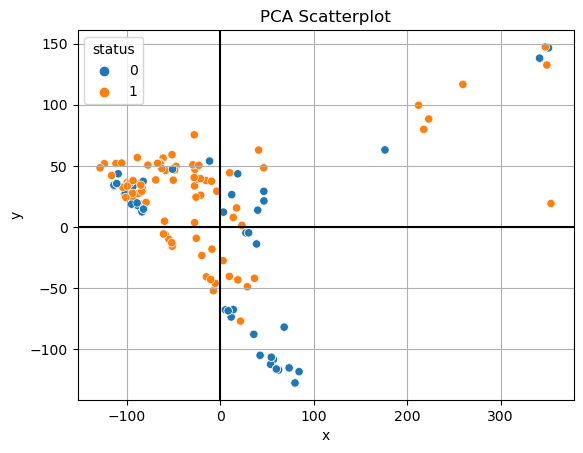

In [6]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA
import seaborn as sns

# test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(train_X) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_base = None
max_expvar_base = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_base:
        max_expvar_base = explained_variance
        best_comp_base = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit and transform the model
transformed = pca.fit_transform(train_X)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = train_y

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


### Experimenting with Hierarchical Clustering for Feature Selection - Baseline

#### HC on Baseline

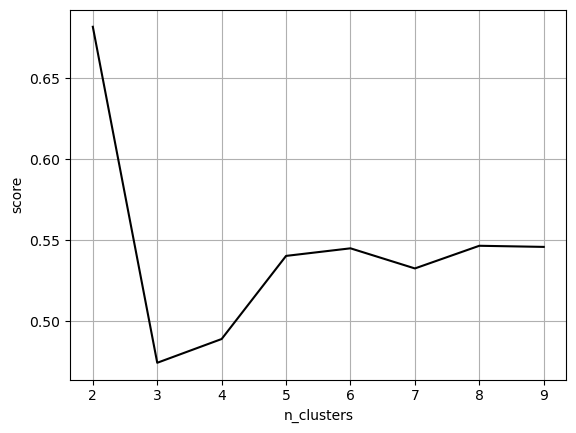

Cluster 2: Mean Silhouette Score: 0.6816199181034928
Cluster 3: Mean Silhouette Score: 0.47452834773014435
Cluster 4: Mean Silhouette Score: 0.48918448891608707
Cluster 5: Mean Silhouette Score: 0.540405625392545
Cluster 6: Mean Silhouette Score: 0.545074647659957
Cluster 7: Mean Silhouette Score: 0.5326758631687767
Cluster 8: Mean Silhouette Score: 0.5466474105552115
Cluster 9: Mean Silhouette Score: 0.545954520595484


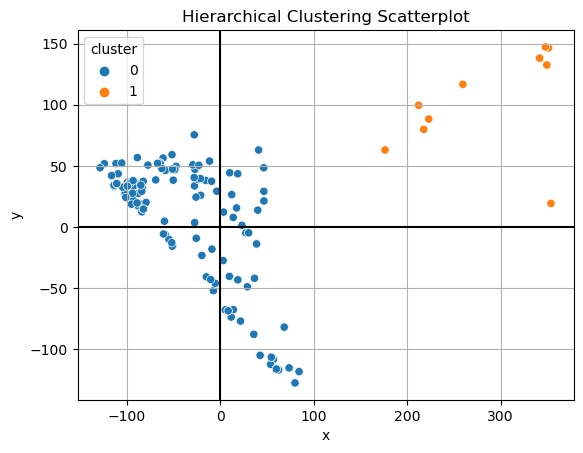

Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer 0.0003587883762179729


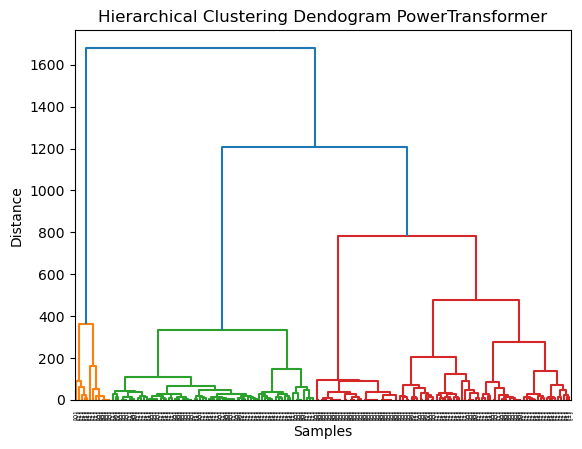

In [7]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(train_X) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(train_X, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(train_X, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(train_X, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarchical Clustering Dendogram PowerTransformer')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df['cluster']))

#### HC on Baseline and PCA reduced

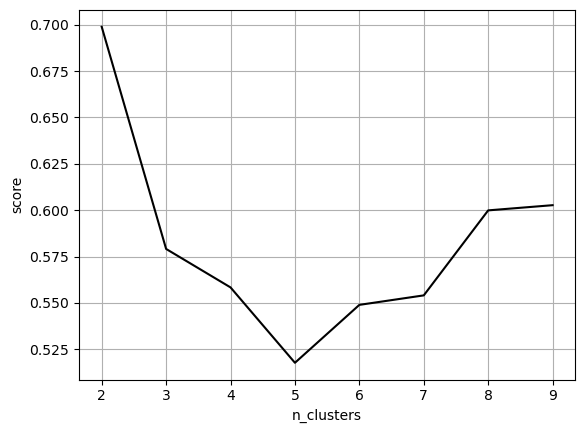

Cluster 2: Mean Silhouette Score: 0.6988318166574307
Cluster 3: Mean Silhouette Score: 0.5790851330719261
Cluster 4: Mean Silhouette Score: 0.5583507193721711
Cluster 5: Mean Silhouette Score: 0.5177214917724114
Cluster 6: Mean Silhouette Score: 0.5489390807080892
Cluster 7: Mean Silhouette Score: 0.5540555081803832
Cluster 8: Mean Silhouette Score: 0.599872011814731
Cluster 9: Mean Silhouette Score: 0.602667683659979


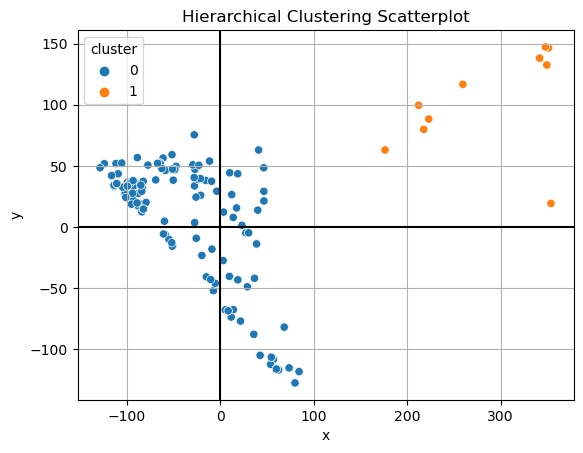

Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer 0.0003587883762179729


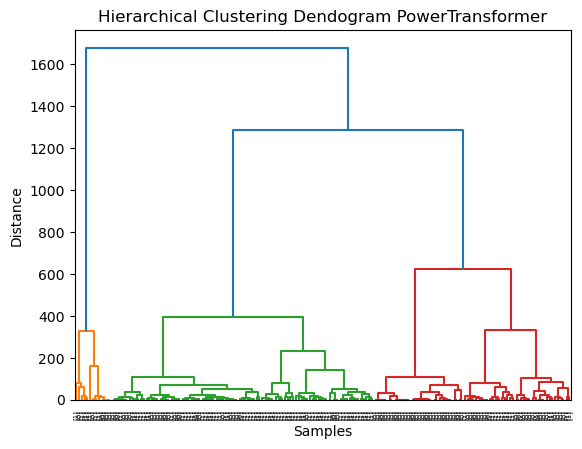

In [8]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(transformed) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(transformed, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(transformed, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(transformed, method='ward')
#Z = linkage(transformed, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarchical Clustering Dendogram PowerTransformer')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df['cluster']))

### Logistic Regression - Baseline

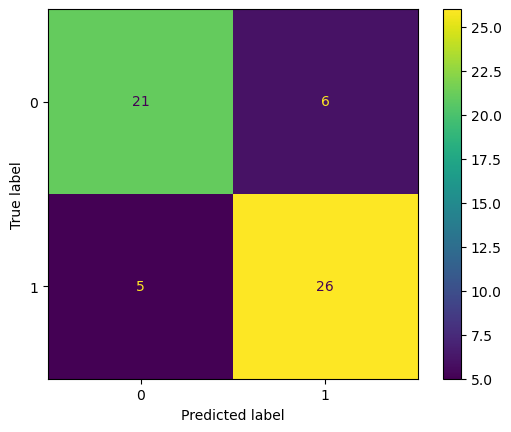

Accuracy:0.8103448275862069
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.81      0.84      0.83        31

    accuracy                           0.81        58
   macro avg       0.81      0.81      0.81        58
weighted avg       0.81      0.81      0.81        58



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.get_params()

pca = PCA(n_components = best_comp_base)
transformed = pca.fit_transform(train_X)

log_model.fit(transformed, train_y.to_numpy().ravel())
transformed_test = pca.transform(test_X.values)

predictions_base = log_model.predict(transformed_test)

cm_base = confusion_matrix(test_y, predictions_base, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_base, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_base)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_base, labels=log_model.classes_))

### Decision Tree - Baseline

In [10]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()

pca = PCA(n_components = best_comp_base)

transformed_base = pca.fit_transform(train_X)

# fit the model
dt.fit(transformed_base, train_y)
transformed_test = pca.transform(test_X.values)

predict_pow_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_pow_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.9310344827586207


Depth:1 and Scores:0.7271241830065359
Depth:2 and Scores:0.669607843137255
Depth:3 and Scores:0.8359477124183007
Depth:4 and Scores:0.8300653594771242
Depth:5 and Scores:0.8300653594771242
Depth:6 and Scores:0.8866013071895426
Depth:7 and Scores:0.8758169934640524
Depth:8 and Scores:0.8869281045751635
Depth:9 and Scores:0.8869281045751635
Depth:10 and Scores:0.8869281045751635
Depth:11 and Scores:0.8869281045751635
Depth:12 and Scores:0.8869281045751635
Depth:13 and Scores:0.8869281045751635
Depth:14 and Scores:0.8869281045751635
Feature:1 and Scores:0.8630718954248365
Feature:2 and Scores:0.8800653594771243
Feature:3 and Scores:0.8581699346405228
Feature:4 and Scores:0.8859477124183007
Feature:5 and Scores:0.8349673202614378
Feature:6 and Scores:0.8980392156862745
Feature:7 and Scores:0.868954248366013
Feature:8 and Scores:0.8352941176470589
Feature:9 and Scores:0.8398692810457515
Feature:10 and Scores:0.8506535947712418
Feature:11 and Scores:0.8640522875816995
Feature:12 and Scores:0

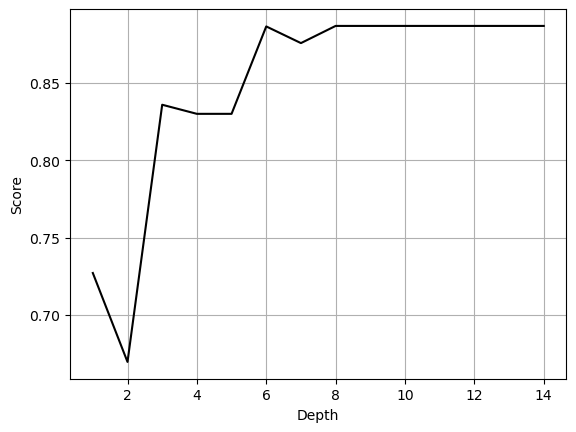

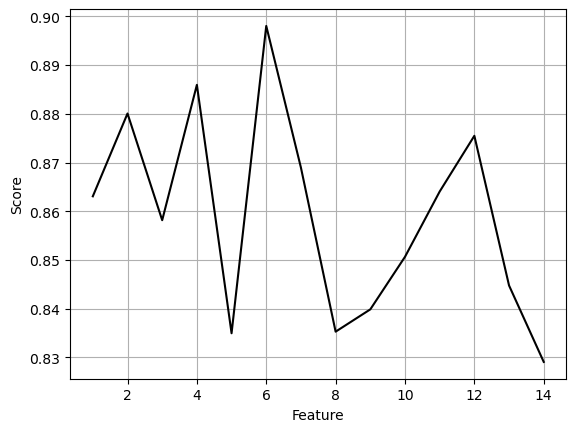

In [11]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_base, train_y, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_base, train_y, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

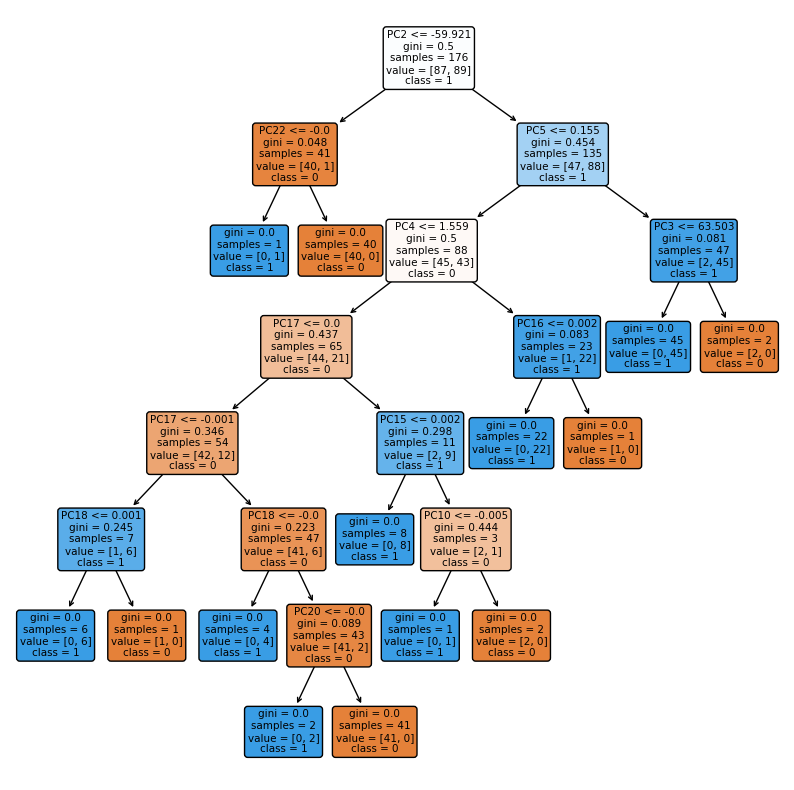

Best depth score: 8 and Best feature score: 6


In [12]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_base = pca.fit_transform(train_X)

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base, train_y)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

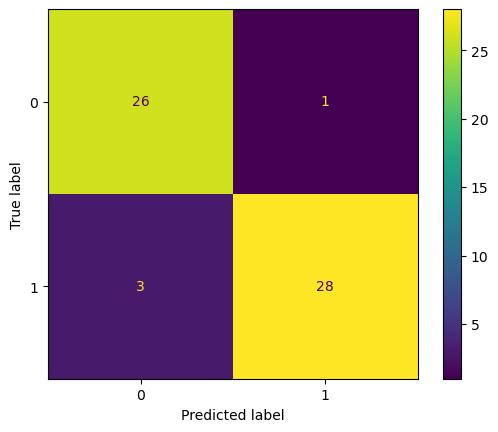

Accuracy of tuned model:0.9310344827586207


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base, train_y)

predict_test = dt.predict(transformed_test)

cm_base = confusion_matrix(test_y, predict_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_base, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_test)
print(f'Accuracy of tuned model:{accuracy}')

## Experimenting with Baseline data Outliers Removed

### Expirmenting with PCA - Baseline Outliers Removed

Component 1: Explained Variance 0.6824160335654699
Component 2: Explained Variance 0.9588103272893044
Component 3: Explained Variance 0.9989610088303222
Component 4: Explained Variance 0.9999648479475038
Component 5: Explained Variance 0.9999946128307375
Component 6: Explained Variance 0.9999987177803656
Component 7: Explained Variance 0.9999993358065092
Component 8: Explained Variance 0.9999996980465378
Component 9: Explained Variance 0.9999998725513931
Component 10: Explained Variance 0.9999999454895232
Component 11: Explained Variance 0.9999999735367617
Component 12: Explained Variance 0.9999999957234516
Component 13: Explained Variance 0.9999999988711887
Component 14: Explained Variance 0.9999999994785208
Component 15: Explained Variance 0.9999999998096883
Component 16: Explained Variance 0.9999999999644752
Component 17: Explained Variance 0.9999999999858532
Component 18: Explained Variance 0.9999999999971069
Component 19: Explained Variance 0.9999999999999981
Component 20: Explain

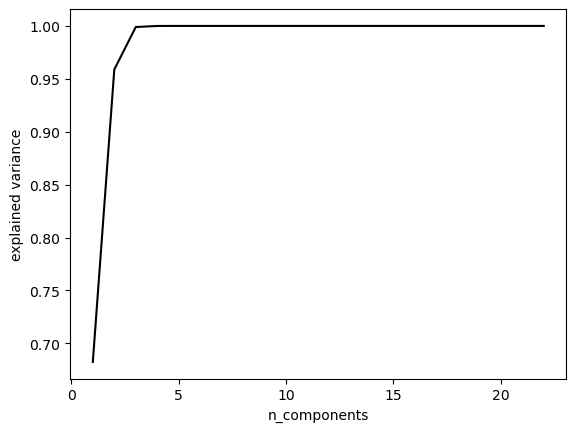

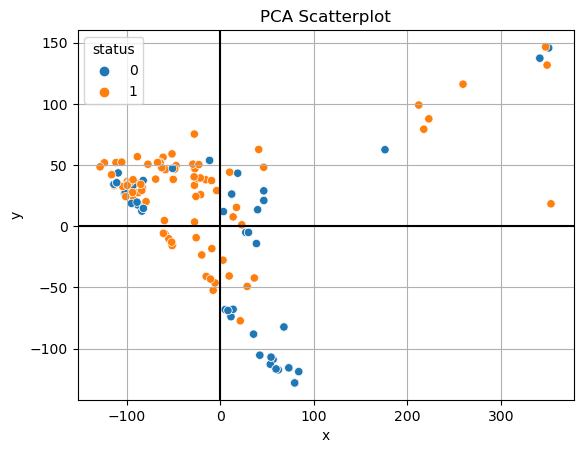

In [27]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA
import seaborn as sns

# test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_base_no = None
max_expvar_base = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_base:
        max_expvar_base = explained_variance
        best_comp_base_no = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit and transform the model
transformed = pca.fit_transform(X_train_no_outliers)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = y_train_no_outliers

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


## Experimenting with Hierarchical Clustering - Baseline Outliers Removed

#### HC on Baseline Outliers Removed

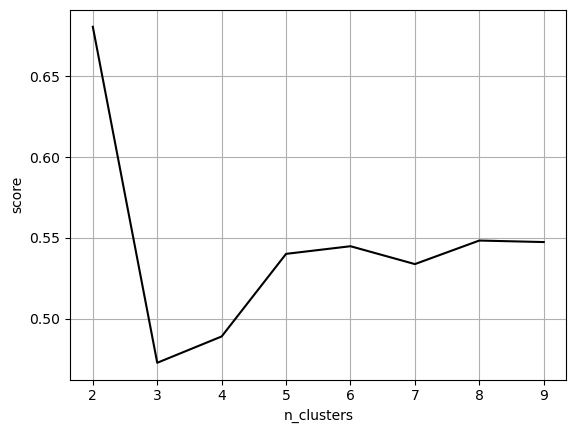

Cluster 2: Mean Silhouette Score: 0.6807052690665154
Cluster 3: Mean Silhouette Score: 0.47275675016937097
Cluster 4: Mean Silhouette Score: 0.48904675929252767
Cluster 5: Mean Silhouette Score: 0.5401682386530341
Cluster 6: Mean Silhouette Score: 0.5448909278430601
Cluster 7: Mean Silhouette Score: 0.5338321538503891
Cluster 8: Mean Silhouette Score: 0.5484112361728978
Cluster 9: Mean Silhouette Score: 0.5474683757532525


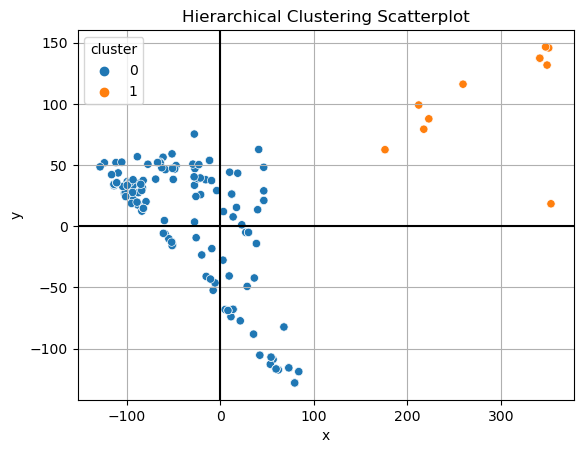

Hierarchical Clustering-Agglomerative NMI Score for Baseline 0.0004987648986259499


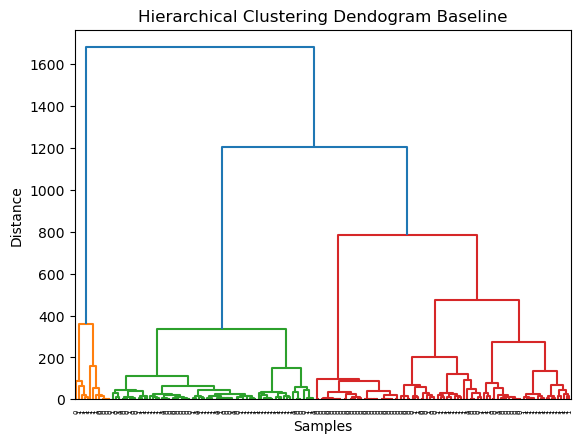

In [28]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(X_train_no_outliers)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(X_train_no_outliers, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=y_train_no_outliers)
plt.title('Hierarchical Clustering Dendogram Baseline')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for Baseline", 
      normalized_mutual_info_score(y_train_no_outliers, df['cluster']))

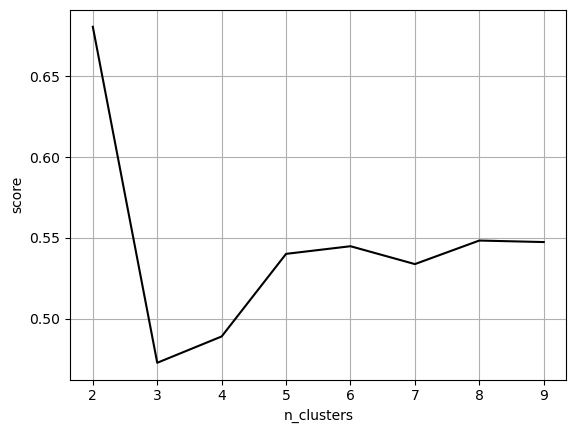

Cluster 2: Mean Silhouette Score: 0.6807052690665154
Cluster 3: Mean Silhouette Score: 0.47275675016937097
Cluster 4: Mean Silhouette Score: 0.48904675929252767
Cluster 5: Mean Silhouette Score: 0.5401682386530341
Cluster 6: Mean Silhouette Score: 0.5448909278430601
Cluster 7: Mean Silhouette Score: 0.5338321538503891
Cluster 8: Mean Silhouette Score: 0.5484112361728978
Cluster 9: Mean Silhouette Score: 0.5474683757532525


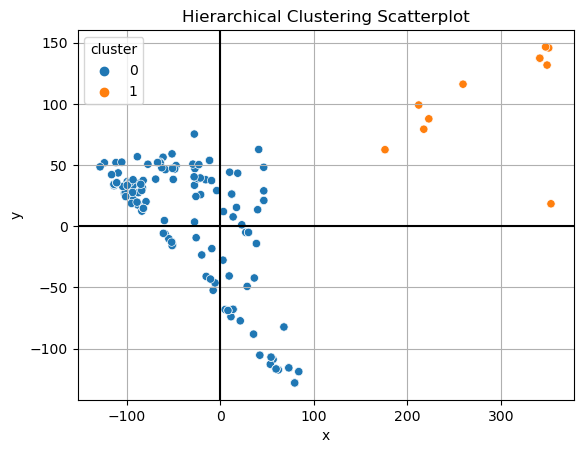

Hierarchical Clustering-Agglomerative NMI Score for Baseline 0.0004987648986259499


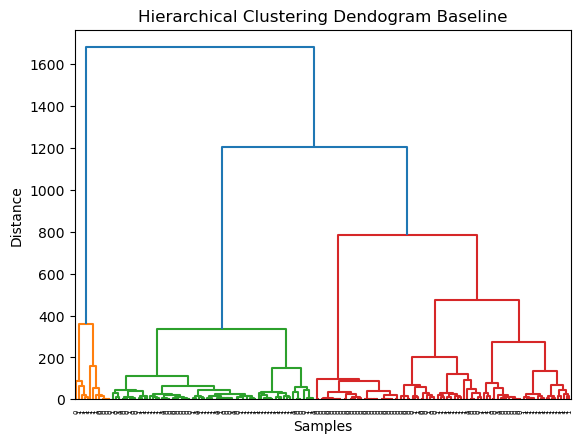

In [29]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(X_train_no_outliers)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(X_train_no_outliers, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=y_train_no_outliers)
plt.title('Hierarchical Clustering Dendogram Baseline')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for Baseline", 
      normalized_mutual_info_score(y_train_no_outliers, df['cluster']))

### Experimenting with Logistic Regression - Baseline Outliers Removed

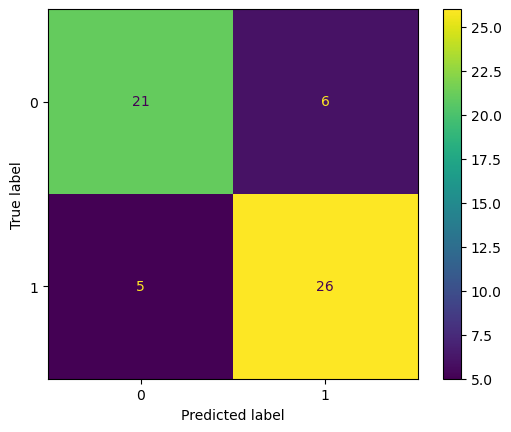

Accuracy:0.8103448275862069
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.81      0.84      0.83        31

    accuracy                           0.81        58
   macro avg       0.81      0.81      0.81        58
weighted avg       0.81      0.81      0.81        58



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.get_params()

pca = PCA(n_components = best_comp_base_no)
transformed_base_no = pca.fit_transform(X_train_no_outliers)

log_model.fit(transformed_base_no, y_train_no_outliers)
transformed_test = pca.transform(test_X.values)

predictions_base_no = log_model.predict(transformed_test)

cm_base_no = confusion_matrix(test_y, predictions_base_no, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_base_no, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_base_no)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_base_no, labels=log_model.classes_))

### Decision Tree - Baseline Outliers Removed

In [34]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()

pca = PCA(n_components = best_comp_base_no)

transformed_base_no = pca.fit_transform(X_train_no_outliers)

# fit the model
dt.fit(transformed_base_no, y_train_no_outliers)
transformed_test = pca.transform(test_X.values)

predict_base_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_base_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.896551724137931


Depth:1 and Scores:0.723202614379085
Depth:2 and Scores:0.6607843137254903
Depth:3 and Scores:0.8284313725490197
Depth:4 and Scores:0.8630718954248365
Depth:5 and Scores:0.8513071895424836
Depth:6 and Scores:0.857516339869281
Depth:7 and Scores:0.8803921568627452
Depth:8 and Scores:0.8803921568627452
Depth:9 and Scores:0.8803921568627452
Depth:10 and Scores:0.8803921568627452
Depth:11 and Scores:0.8803921568627452
Depth:12 and Scores:0.8803921568627452
Depth:13 and Scores:0.8803921568627452
Depth:14 and Scores:0.8803921568627452
Feature:1 and Scores:0.8267973856209151
Feature:2 and Scores:0.8336601307189542
Feature:3 and Scores:0.7996732026143791
Feature:4 and Scores:0.8454248366013072
Feature:5 and Scores:0.7986928104575164
Feature:6 and Scores:0.8781045751633988
Feature:7 and Scores:0.8735294117647058
Feature:8 and Scores:0.8225490196078432
Feature:9 and Scores:0.861437908496732
Feature:10 and Scores:0.8735294117647058
Feature:11 and Scores:0.8568627450980392
Feature:12 and Scores:0.

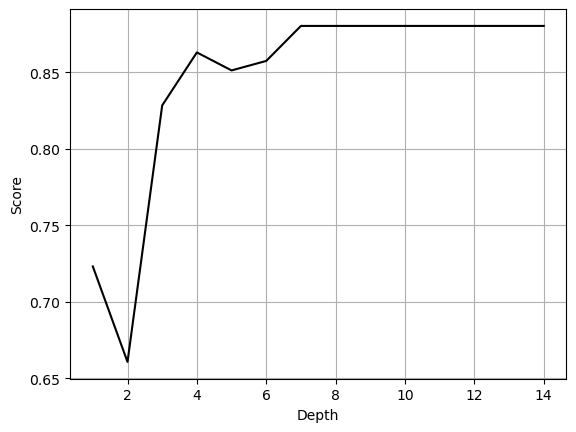

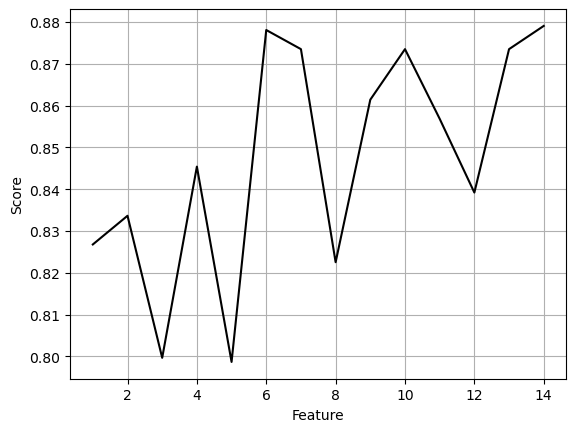

In [36]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_base_no, y_train_no_outliers, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_base_no, y_train_no_outliers, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

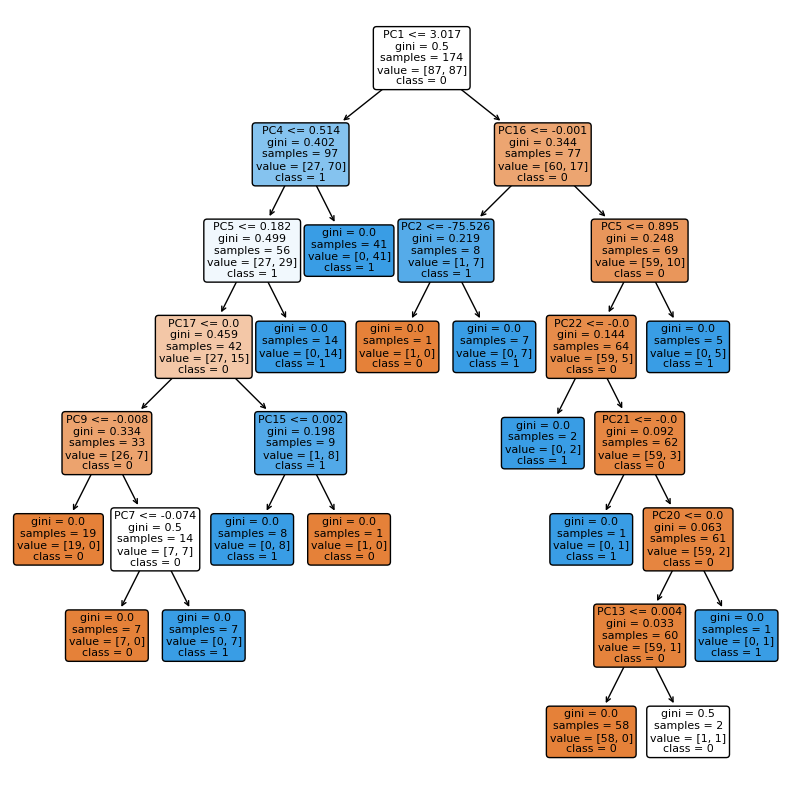

Best depth score: 7 and Best feature score: 14


In [37]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_base_no = pca.fit_transform(X_train_no_outliers)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base_no, y_train_no_outliers)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

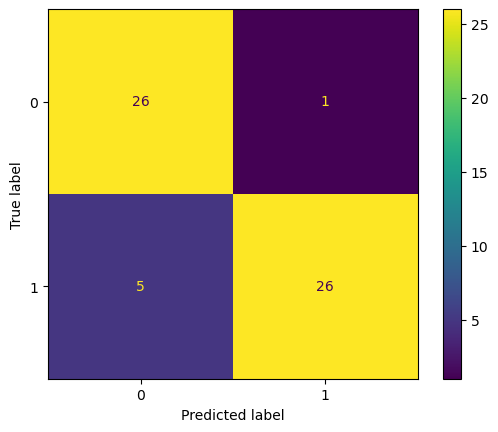

Accuracy of tuned model:0.896551724137931


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base_no, y_train_no_outliers)

predict_test = dt.predict(transformed_test)

cm_base_no = confusion_matrix(test_y, predict_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_base_no, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_test)
print(f'Accuracy of tuned model:{accuracy}')